1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

# output plots
!mkdir plots

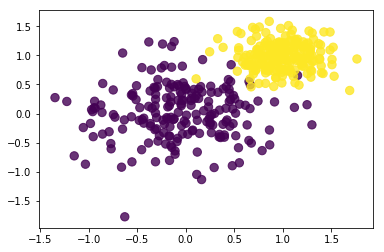

In [6]:
from IPython.display import Image
Image('../lectures/two_categories_scatter_plot.png')

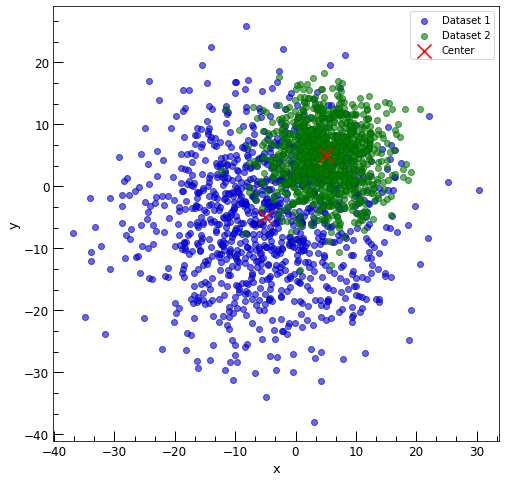

In [98]:
# generate 100 2d gaussian samples, giving parameters
def gauss2d(mu, sigma):
    return np.random.normal( loc=mu, scale=sigma, size=(1000, 1000) )

# generate datasets
sample1 = gauss2d(5., 5.)
sample2 = gauss2d(-5., 10.)

# plot layout
fig, ax = plt.subplots(figsize=(8, 8))
#fig.tight_layout()

# plot
ax.scatter( x=sample2[:,0], y=sample2[:,1], marker='o', color='blue', edgecolor='darkblue', alpha=0.6, label='Dataset 1')
ax.scatter( x=sample1[:,0], y=sample1[:,1], marker='o', color='green', edgecolor='darkgreen', alpha=0.6, label='Dataset 2')

# ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
ax.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)

# centers
ax.scatter( x=5., y=5., marker='x', color='red', s=200)
ax.scatter( x=-5., y=-5., marker='x', color='red', s=200, label='Center')

# labels
ax.set_xlabel("x", fontsize=13)
ax.set_ylabel("y", fontsize=13)
ax.legend(loc="upper right")

# show and save
plt.show()
fig.savefig("plots/scatterPlot.pdf")

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [99]:
# get data
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2021-11-29 13:48:09--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-11-29 13:48:09--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef9b9af9f066ef565976b54d87.dl.dropboxusercontent.com/cd/0/inline/Ba7IE3h7Z8L-sGgpLSfzdF8pjQ2aPy9dXz3f6FtwuE_t3BX-SirAX7eu8WTOTYBCdASDUo15D8R2y5Rh7JZdWieG8WGLht5qkX4aFKEDqG48_HqRJWgXf8CfiKiYhozczYYDi4acQXreqyGKlFkQHV3P/file# [following]
--2021-11-29 13:48:09--  https://ucef9b9af9f066ef565976b54d87.dl.dropboxusercontent.com/cd/0/inline/Ba7IE3h7Z8L-sGgpLSfzdF8pjQ2aPy9dXz3f6FtwuE_t3BX-SirAX7eu8WTOTYBCdASDUo15

In [100]:
import pickle

fName = "data/residuals_261.pkl"

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


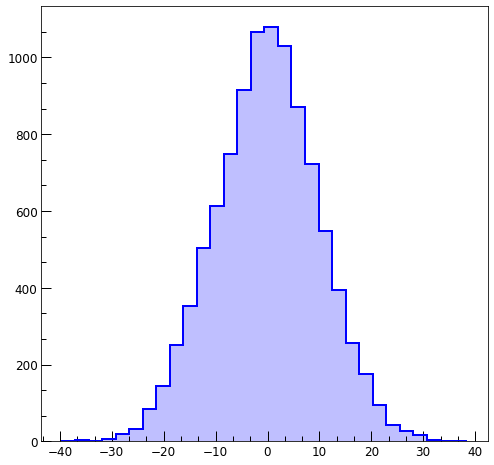

In [118]:
# array of normally distributed numbers
nr = np.random.normal(loc=0., scale=10., size=(10000,))

# histogram
fig, ax = plt.subplots(figsize=(8, 8))
_ = ax.hist(nr, bins=30, histtype="stepfilled", label="Data", facecolor="blue", alpha=0.25)
_ = ax.hist(nr, bins=30, histtype="step", edgecolor="blue", linewidth=2)

# ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
ax.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)